# Dropzone Detection with Yolov7

**Goal of this notebook**

Train a yolov7 model on a custom dataset.  Create a program that gives instructions to align the camera with the dropzone.

**Some instructions to get this setup**

1. create conda environment with python=3.9
2. install pytorch with conda like it says to do on the official installation (use your cuda version)
* conda install pytorch torchvision torchaudio pytorch-cuda=11.7 -c pytorch -c nvidia

3. Follow this: https://www.youtube.com/watch?v=-QWxJ0j9EY8&t=378s
* skip the step where he creates the requirements_gpu step
* just run pip install -r requirements.txt instead

4. You will run into an error that is the exact same as this stack overflow post!  Follow the check marked answer and the code will work.
* https://stackoverflow.com/questions/74372636/indices-should-be-either-on-cpu-or-on-the-same-device-as-the-indexed-tensor

In [2]:
%cd yolov7

C:\Users\holla\Documents\PyTorch\UAS-club-yolov7-drone-cv-mockup-v2\yolov7


**Improvement** Instead us using --weights yolov7.pt, download the yolov7_training.pt from the transfer learning section in the repository

In [1]:
# command to train the dataset (train on cuda because of how I modified the files from the stack overflow post)
# python train.py --workers 1 --device 0 --batch-size 8 --epochs 100 --img 640 640 --data data/custom-dataset.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolov7-custom.yaml --name yolov7-custom --weights yolov7.pt


try detect.py on the horse images given by the yolov7 repository

In [2]:
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source inference/images/horses.jpg


C:\Users\holla\Documents\PyTorch\UAS-club-yolov7-drone-cv-mockup-v2\yolov7
Namespace(weights=['yolov7.pt'], source='inference/images/horses.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

5 horses, Done. (50.2ms) Inference, (6.0ms) NMS
 The image with the result is saved in: runs\detect\exp\horses.jpg
Done. (0.277s)


YOLOR  df2977d torch 1.13.0 CUDA:0 (NVIDIA GeForce GTX 1060 with Max-Q Design, 6143.8125MB)

Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
C:\Users\holla\Documents\PyTorch\UAS-club-yolov7-drone-cv-mockup-v2\env\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


try detect.py on a custom dropzone image

In [4]:
!python detect.py --weights runs/train/yolov7-custom3/weights/best.pt --conf 0.4 --img-size 640 --source data/images/WIN_20221124_18_49_14_Pro.jpg --view-img --no-trace


Namespace(weights=['runs/train/yolov7-custom3/weights/best.pt'], source='data/images/WIN_20221124_18_49_14_Pro.jpg', img_size=640, conf_thres=0.4, iou_thres=0.45, device='', view_img=True, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
1 zone 1, Done. (46.2ms) Inference, (6.5ms) NMS
 The image with the result is saved in: runs\detect\exp2\WIN_20221124_18_49_14_Pro.jpg
Done. (0.383s)


YOLOR  df2977d torch 1.13.0 CUDA:0 (NVIDIA GeForce GTX 1060 with Max-Q Design, 6143.8125MB)

C:\Users\holla\Documents\PyTorch\UAS-club-yolov7-drone-cv-mockup-v2\env\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36481772 parameters, 6194944 gradients, 103.2 GFLOPS


## Get Instance of Model

cool article : https://stackabuse.com/real-time-pose-estimation-from-video-in-python-with-yolov7/

In [3]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def load_model():
    model = torch.load('runs/train/yolov7-custom3/weights/best.pt', map_location=device)['model']
    # Put in inference mode
    model.float().eval()

    if torch.cuda.is_available():
        # half() turns predictions into float16 tensors
        # which significantly lowers inference time
        model.half().to(device)
    return model

model = load_model()
model

Model(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (1): Conv(
      (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (2): Conv(
      (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (3): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU()
    )
    (4): Conv(
      (conv): Conv2d(128, 64, kernel_size=(1, 1), 

In [4]:
from utils.datasets import letterbox

results.shape torch.Size([1, 15120, 6])


AttributeError: 'Tensor' object has no attribute 'render'

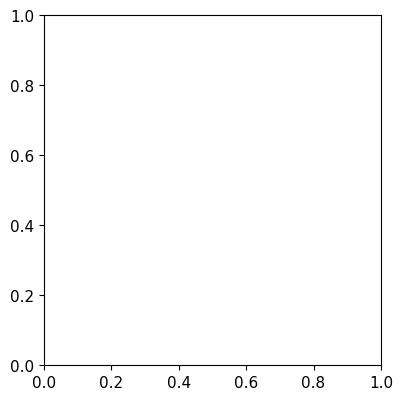

In [13]:
import cv2
import glob
import matplotlib.pyplot as plt
import random
import numpy as np
import torchvision
%matplotlib inline

# Get All Image Paths
all_img_paths = glob.glob("data/images/*.jpg")

plt.figure(figsize=(20,10))
for i in range(1):
    # Pick Random Path
    random_path = random.choice(all_img_paths)
#     random_path = "data/multiple-zones-test-img.jpg" # This image proves results_xyxy sorted with highest confidence first (confidence descending)
    plt.subplot(2,4,i+1) # setup subplot
    img = cv2.imread(random_path)
    
    # Resize and pad image
    img = letterbox(img, 640, stride=64, auto=True)[0]
    
    # Apply transforms
    img = torchvision.transforms.ToTensor()(img) # torch.Size([3, 567, 960])
    if torch.cuda.is_available():
      img = img.half().to(device)
    
    # Turn image into batch
    img = img.unsqueeze(0) # torch.Size([1, 3, height, width])
        
    # Get Results from Model
    with torch.no_grad():
        results, _ = model(img)
    print("results.shape",results.shape)
    
    # Show Image
    show_img = img[0].permute(1, 2, 0) * 255
    show_img = show_img.cpu().numpy().astype(np.uint8)
    show_img = cv2.cvtColor(show_img, cv2.COLOR_RGB2BGR)
#     show_img = cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB)
#     show_img = np.squeeze(results.render())
    
#     # Screen dimensions
#     height=img.shape[0]
#     width=img.shape[1]
    
#     # Screen Center
#     screen_center_x = width /2
#     screen_center_y = height /2
#     screen_center_x, screen_center_y = int(screen_center_x), int(screen_center_y)
#     print("center_x", screen_center_x, "center_y", screen_center_y)
    
#     if not results.pandas().xyxy[0].empty:
#         # Sort Results
#         results_xyxy = results.pandas().xyxy[0].sort_values(by=["confidence"], ascending=False) # row 0 has highest confidence
#         print("results.xyxy sorted:\n", results_xyxy)
#         print("highest confidence", results.pandas().xyxy[0]["confidence"].max())
#         print("row with highest result:", results_xyxy["confidence"].idxmax())
#         highest_confidence_row = results_xyxy.iloc[0]
    
#         # Bounding Box Data
#         xmin = int(highest_confidence_row["xmin"])
#         xmax = int(highest_confidence_row["xmax"])
#         ymin = int(highest_confidence_row["ymin"])
#         ymax = int(highest_confidence_row["ymax"])
#         center_x = (xmin + xmax)/2
#         center_y = (ymin + ymax)/2
#         center_x, center_y = int(center_x), int(center_y)
        
#         # Variables for Text
#         text = "Need to move up"
#         coordinates = (100,height-100)
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         fontScale = 4
#         color = (255,0,0)
#         thickness = 10

#         if (xmax-xmin) * (ymax-ymin) > 200*200:
#             show_img = cv2.putText(show_img, text, coordinates, font, fontScale, color, thickness, cv2.LINE_AA)
#             print("need to move up")
#         else:
#             # Display Rectangles
#             if (xmin < screen_center_x - 100):
#                 cv2.arrowedLine(show_img, (width-150, screen_center_y), (width-50, screen_center_y), (0, 255, 0), 30, tipLength = 0.5)
#                 print("move to the right")
#             elif (xmax > screen_center_x+100):
#                 cv2.arrowedLine(show_img, (150, screen_center_y), (50, screen_center_y), (0, 255, 0), 30, tipLength = 0.5)
#                 print("move to the left")
#             else:
#                 cv2.circle(show_img, (center_x, center_y), 15, (0, 255, 0), -1)
#                 print("on target")

#             if (ymin < screen_center_y - 100):
#                 cv2.arrowedLine(show_img, (screen_center_x, height-150), (screen_center_x, height-50), (0, 255, 0), 30, tipLength = 0.5)
#                 print("move down")
#             elif (ymax > screen_center_y+100):
#                 cv2.arrowedLine(show_img, (screen_center_x, 150), (screen_center_x, 50), (0, 255, 0), 30, tipLength = 0.5)
#                 print("move up")
#             else:
#                 cv2.circle(show_img, (center_x, center_y), 15, (0, 255, 0), -1)
#                 print("on target")
    
#     # Display target box rectangle
#     cv2.rectangle(show_img, (screen_center_x-100, screen_center_y-100), (screen_center_x+100, screen_center_y+100), (0, 255, 0), 3)
    
#     # Display middle of detected object
# #     cv2.circle(show_img, (center_x, center_y), 30, (255, 0, 0), -1)
    

    plt.imshow(show_img)
    
    plt.axis(False);